<a href="https://colab.research.google.com/github/desakim/ESAA_YB2/blob/main/desakim_YB2_33.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 7. 군집화
## 01 K-평균 알고리즘 이해
K-평균은 군집화(Clustering)에서 가장 일반적으로 사용되는 알고리즘임. K-평균은 군집 중심점(centroid)이라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법임. \
군집 중심점은 선택된 포인트의 평균 지점으로 이동하고 이동된 중심점에서 다시 가까운 포인트를 선택, 다시 중심점을 평균 지점으로 이동하는 프로세스를 반복적으로 수행함. 모든 데이터 포인트에서 더 이상 중심점의 이동이 없을 경우에 반복을 멈추고 해당 중심점에 속하는 데이터 포인트들을 군집화하는 기법. \
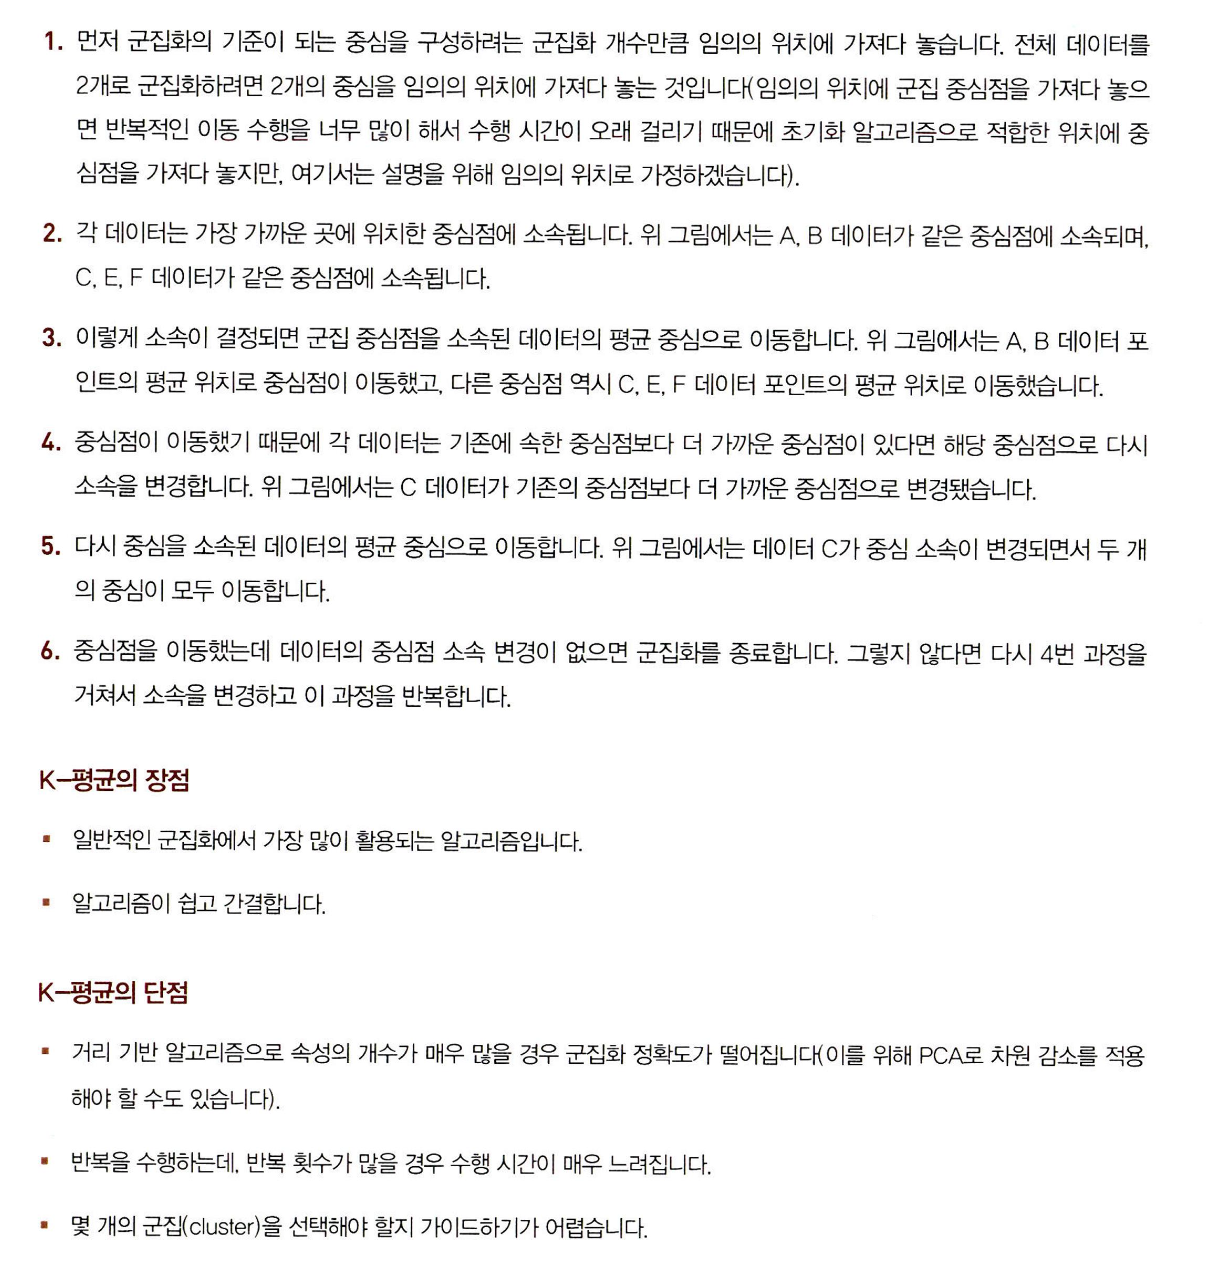![image.png](
  
)

## 사이킷런 KMeans 클래스 소개
사이킷런 패키지는 K-평균을 구현하기 위해 KMeans 클래스를 제공함. KMeans 클래스는 다음과 같은 초기화 파라미터를 가지고 있음.

In [ ]:
class sklearn.cluster.KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001,
                             precompute_distances='auto', verbose=0, random_state=None,
                             copy_x=True, n_jobs=1, algorithm='auto')

이 중 중요한 파라미터는 다음과 같음.\
KMeans 초기화 파라미터 중 가장 중요한 파라미터는 n_clusters이며, 이는 군집화할 개수, 즉 군집 중심점의 개수를 의미함.\
init는 초개에 군집 중심점의 좌표를 설정할 방식을 말하며 보통은 임의로 중심을 설정하지 않고 일반적으로 k-means++ 방식으로 최초 설정함.\
max_iter는 최대 반복 횟수이며, 이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료함.\
KMeans는 사이킷런의 비지도학습 클래스와 마찬가지로 fit(데이터 세트) 또는 fit_transform(데이터 세트) 메서드를 이용해 수행하면 됨. 이렇게 수행된 KMeans 객체는 군집화 수행이 완료돼 군집화와 관련된 주요 속성을 알 수 있음. 다음은 이 주요 속성 정보임.\
labels_: 각 데이터 포인트가 속한 군집 중심점 레이블 \
cluster_centers_: 각 군집 중심점 좌표(Shape는 [군집 개수, 피처 개수]). 이를 이용하면 군집 중심점 좌표가 어디인지 시각화할 수 있음.

## K-평균을 이용한 붓꽃 데이터 세트 군집화

In [ ]:
import warnings
warnings.filterwarnings(action = "ignore")

In [ ]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
# 더 편리한 데이터 핸들링을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [ ]:
# 붓꽃 데이터 세트를 3개 그룹으로 군집화
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

In [ ]:
# kmeans의 labels_ 속성값 출력.
# irisDF의 각 데이터가 어떤 중심에 속하는지를 알 수 있음.
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [ ]:
# 실제 붓꽃 품종 분류 값과 얼마나 차이가 나는지로 군집화가 효과적으로 됐는지 확인
irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_
iris_result = irisDF.groupby(['target', 'cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


In [ ]:
# 붓꽃 데이터 세트의 군집화 시각화
# 속성이 4개이므로 2차원 평면에 적합치 않아 PCA를 이용해 4개의 속성을 2개로 차원 축소한 뒤 X, Y좌표로 개별 데이터를 표현함
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

# pca_x는 X 좌표 값, pca_y는 Y 좌표 값을 나타냄.
irisDF['pca_x'] = pca_transformed[:, 0]
irisDF['pca_y'] = pca_transformed[:, 1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


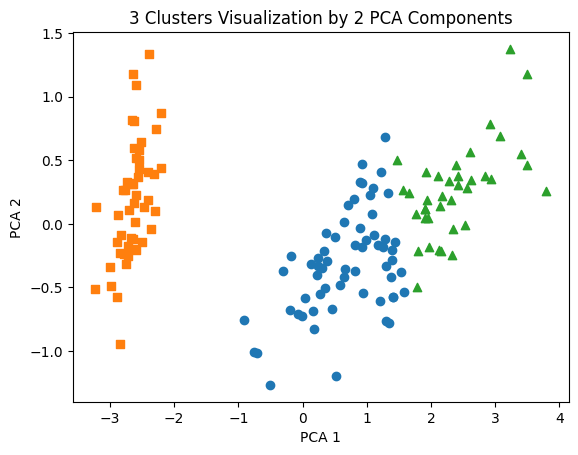

In [ ]:
# 맷플롯립의 산점도는 서로 다른 마커를 한 번에 표현할 수 없으므로 마커별로 별도의 산점도를 수행함.
# 군집 값이 0, 1, 2인 경우마다 별도의 인덱스로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# 군집 값 0, 1, 2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. o, s, ^로 마커 표시
plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()
# Cluster 0과 1의 경우 속성의 위치 자체가 명확히 분리되기 어려운 부분이 있음.

# 군집화 알고리즘 테스트를 위한 데이터 생성
사이킷런은 다양한 유형의 군집화 알고리즘을 테스트해 보기 위한 간단한 데이터 생성기를 제공함. 대표적으로 make_blobs()와 make_classification() API가 있음. 두 API는 비슷하게 여러 개의 클래스에 해당하는 데이터 세트를 만드는데, 하나의 클래스에 여러 개의 군집이 분포될 수 있게 데이터를 생성할 수 있음. \
make_blobs()는 개별 군집의 중심점과 표준 편차 제어 기능이 추가되어 있으며, make_classification()은 노이즈를 포함한 데이터를 만드는 데 유용하게 사용할 수 있음. \
둘 다 분류 용도로도 테스트 데이터 생성이 가능함.\
이 외에 make_circle(), make_moon() API는 중심 기반의 군집화로 해결하기 어려운 데이터 세트를 만드는 데 사용됨. \
make_blobs()를 호출하면 피처 데이터 세트와 타깃 데이터 세트가 튜플(Tuple)로 반환됨. 호출 파라미터는 다음과 같음.\
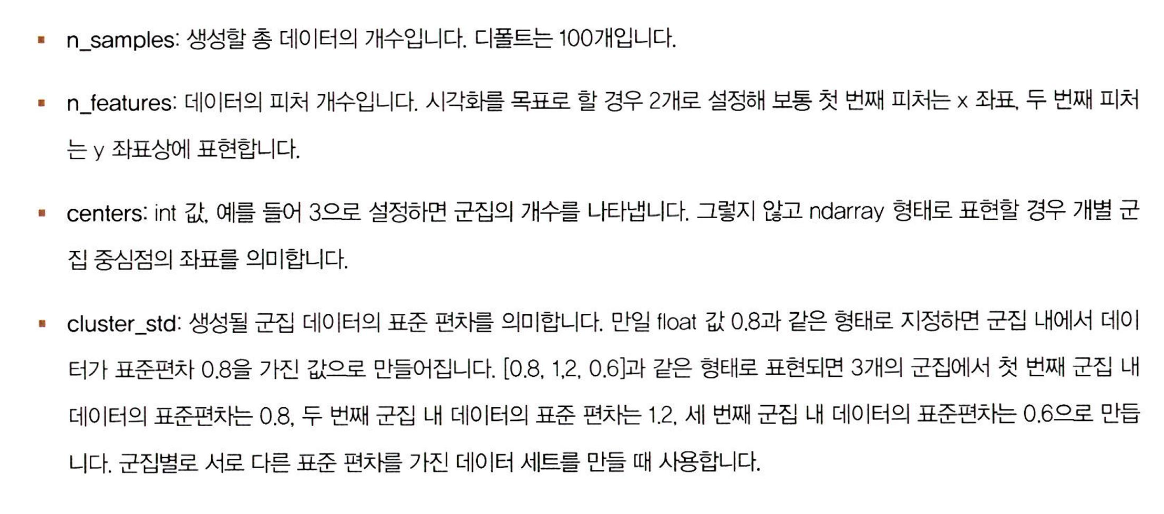

X, y = make_blobs(n_samples=200, n_features=2, centers=3, random_state=0)을 호출하면 총 200개의 레코드와 2개의 피처가 3개의 군집화 기반 분포도를 가진 피처 데이터 세트 X와, 동시에 3개의 군집화 값을 가진 타깃 데이터 세트 y가 반환됨.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [ ]:
# 데이터 가공을 편리하게 하기 위해 위 데이터 세트를 데이터프레임으로 변경
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


각 타깃별 산점도의 마커 값을 다르게 하여 산점도를 그려보면 3개의 구분될 수 있는 군집 영역(make_blobs()이 y 반환 값)으로 피처 데이터 세트가 만들어졌음을 알 수 있음.

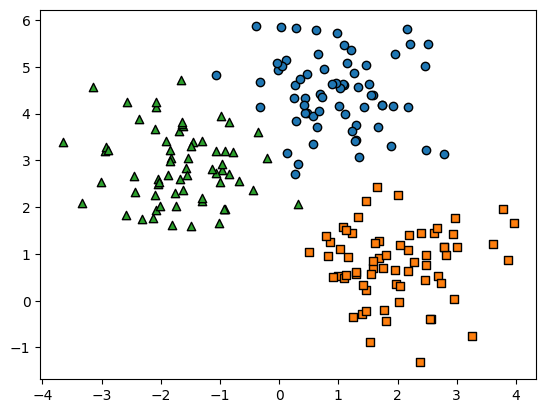

In [ ]:
target_list = np.unique(y)
# 각 타깃별 산점도의 마커 값
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']
# 3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는 [0, 1, 2]
# target==0, target==1, target==2로 scatter plot을 marker별로 생성
for target in target_list:
  target_cluster = clusterDF[clusterDF['target']==target]
  plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target])
plt.show()

# KMeans 군집화를 수행한 뒤에 군집별로 시각화

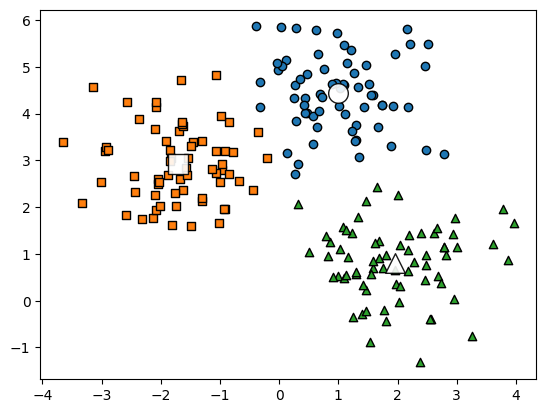

In [ ]:
# KMeans 객체를 이용해 X 데이터를 K-Means 클러스터링 수행
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels

# cluster_centers_는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

# 군집된 label 유형별로 iteration하면서 marker별로 scatter plot 수행
for label in unique_labels:
  label_cluster = clusterDF[clusterDF['kmeans_label']==label]
  center_x_y = centers[label]
  plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])

  # 군집별 중심 위치 좌표 시각화
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
              alpha=0.9, edgecolor='k', marker=markers[label])
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k',
              marker='' % label)

plt.show()

In [ ]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())


target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64


# 02 군집 평가(Cluster Evaluation)

In [ ]:
# 붓꽃 데이터 세트를 이용한 군집 평가
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# 실루엣 분석 평가 지표 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(irisDF)
irisDF['cluster'] = kmeans.labels_

# iris의 모든 개별 데이터에 실루엣 계수 값을 구함
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples() return 값의 shape', score_samples.shape)

# irisDF에 실루엣 계수 칼럼 추가
irisDF['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수 값을 구함
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터 세트 Silhouette Analysis Score: {0:.3f}'.format(average_score))
irisDF.head(3)

silhouette_samples() return 값의 shape (150,)
붓꽃 데이터 세트 Silhouette Analysis Score: 0.553


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


In [ ]:
# 군집별 평균 실루엣 계수 값 - 군집 칼럼별로 group by하여 silhouette_coeff 칼럼의 평균값 구하면 됨
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

In [ ]:
# 시각화
# make_blobs를 통해 군집화를 위한 4개의 군집 중심의 500개 2차원 데이터 세트 생성
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1,
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math

def visualize_silhouette(cluster_lists, X_features):

    # 입력값으로 클러스 터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

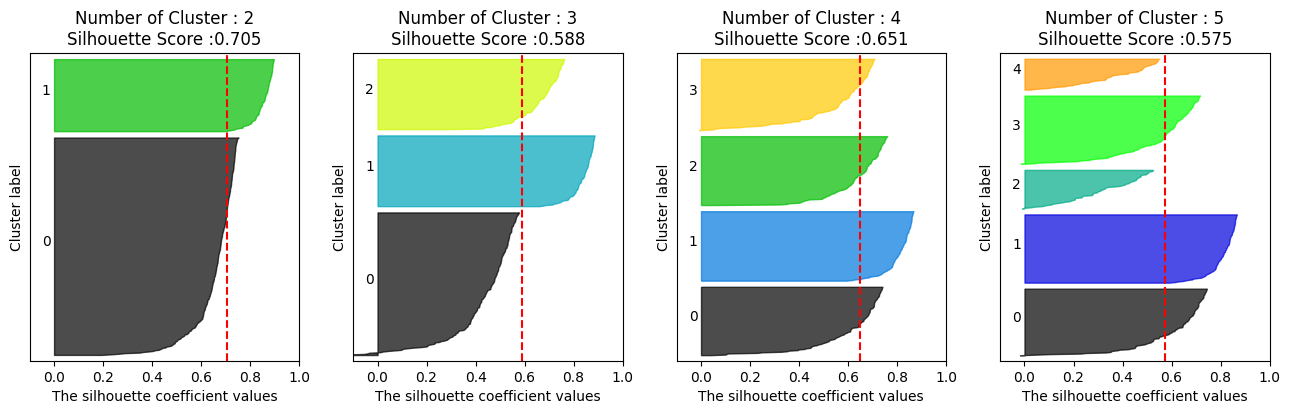

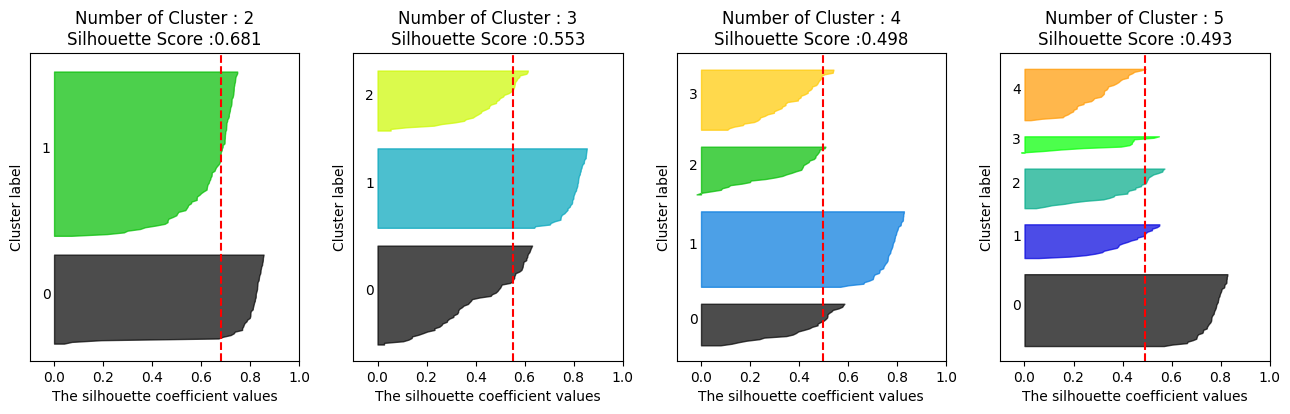

In [ ]:
# 군집 개수가 2개, 3개, 4개, 5개일 때의 군집별 실루엣 계수 평균값을 시각화
visualize_silhouette([2, 3, 4, 5], X)

# 최적의 군집 개수 알아보기
from sklearn.datasets import load_iris
iris = load_iris()
visualize_silhouette([2, 3, 4, 5], iris.data)

# 03 평균 이동

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state=0)

meanshift = MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5]


In [ ]:
meanshift = MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


In [ ]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print('bandwidth 값:', round(bandwidth, 3))

bandwidth 값: 1.816


In [ ]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X)

meanshift = MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


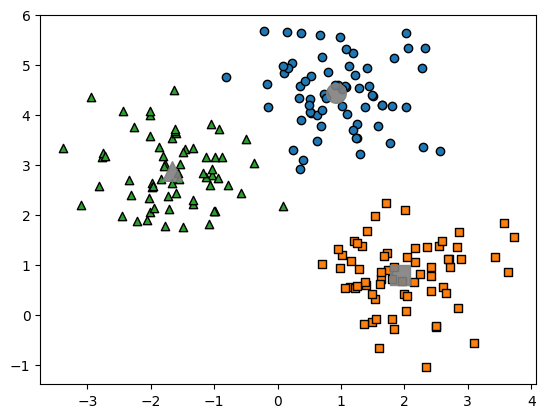

In [ ]:
# 시각화
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label'] = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'x', '*']

for label in unique_labels:
  label_cluster = clusterDF[clusterDF['meanshift_label']==label]
  center_x_y = centers[label]

  # 군집별로 다른 마커로 산점도 적용
  plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])

  # 군집별 중심 표현
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9, marker=markers[label])
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='' % label)

plt.show()

In [ ]:
# target 값과 군집 label 값 비교
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: meanshift_label, dtype: int64


# 04 GMM(Gaussian Mizture Model)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# 좀 더 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

# 군집화 결과를 irisDF의 'gmm_cluster' 칼럼 명으로 저장
irisDF['gmm_cluster'] = gmm_cluster_labels
irisDF['target'] = iris.target

# target 값에 따라 gmm_cluster 값이 어떻게 매핑됐는지 확인
iris_result = irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: gmm_cluster, dtype: int64


In [ ]:
# K-평균 군집화 수행 결과
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)
irisDF['kmeans_cluster'] = kmeans_cluster_labels
iris_result = irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result)

target  kmeans_cluster
0       1                 50
1       0                 48
        2                  2
2       2                 36
        0                 14
Name: kmeans_cluster, dtype: int64


In [ ]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_

    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)

        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)

        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'

    plt.legend(loc=legend_loc)
    plt.show()


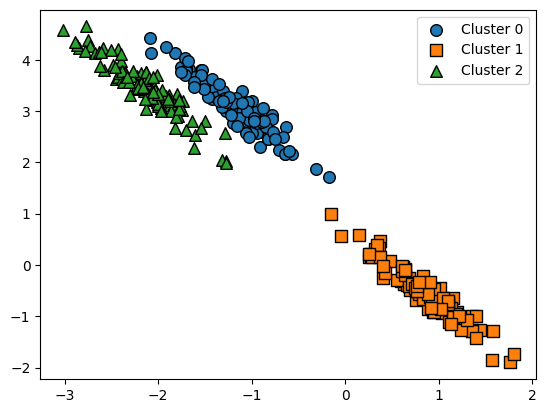

In [ ]:
# 시각화
from sklearn.datasets import make_blobs

# make_blobs()로 300개의 데이터 세트, 3개의 군집 세트, cluster_std=0.5를 만듦
X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

#길게 늘어난 타원형의 데이터 세트를 생성하기 위해 변환함
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
#feature 데이터 세트와 make_blobs()의 y결과값을 DataFrame으로 저장
clusterDF = pd.DataFrame(data=X_aniso, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

#생성된 데이터 세트를 target별로 다른 마커로 표시해 시각화함
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

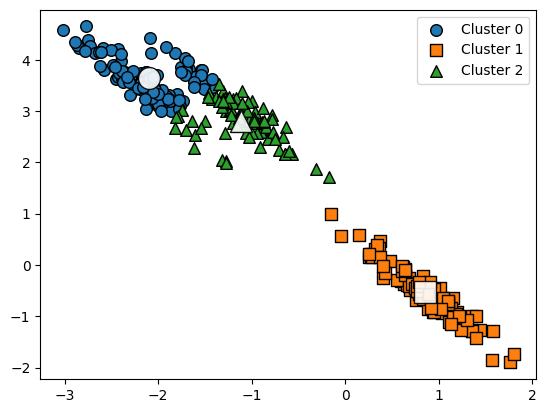

In [ ]:
# KMeans가 위 데이터 세트를 어떻게 군집화하는지 확인
# 3개의 군집 기반 Kmeans를 X_aniso 데이터 세트에 적용
kmeans = KMeans(3, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label'] = kmeans_label

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label', iscenter=True)


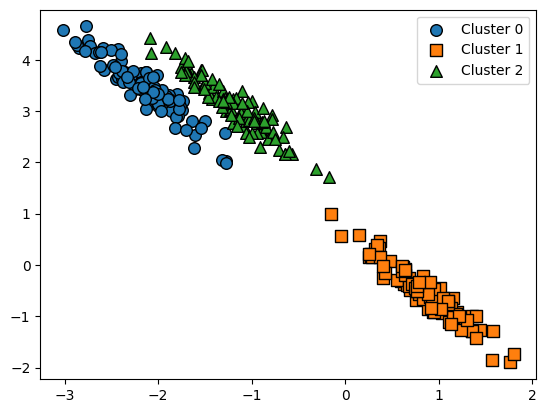

In [ ]:
# GMM으로 군집화 수행
# 3개의 n_components 기반 GMM을 X_aniso 데이터 세트에 적용
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label'] = gmm_label

# GaussianMixture는 cluster_centers_ 속성이 없으므로 iscluster를 False로 설정
visualize_cluster_plot(gmm, clusterDF, 'gmm_label', iscenter=False)

In [ ]:
# 군집화 효율 차이 확인
print('### KMeans Clustering ###')
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print('\n### Gaussian Mixture Clustering ###')
print(clusterDF.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: kmeans_label, dtype: int64

### Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: gmm_label, dtype: int64


# 05 DBSCAN

In [ ]:
# DBSCAN 적용하기 - 붓꽃 데이터 세트
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

# DBSCAN 클래스 이용해 붓꽃 데이터 세트 군집화
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


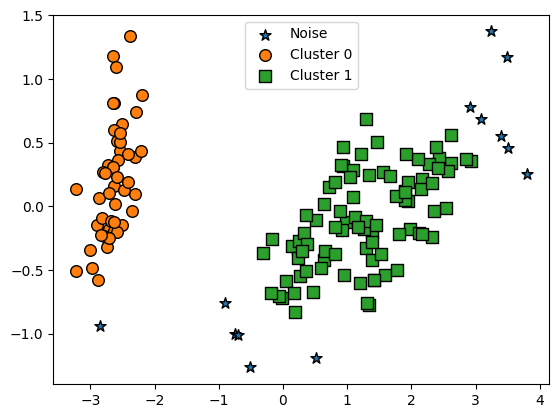

In [ ]:
from sklearn.decomposition import PCA
# 2차원으로 시각화하기 위해 PCA n_components=2로 피처 데이터 세트 변환
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)
# visualize_cluster_2d() 함수는 ftr1, ftr2 칼럼을 좌표에 표현하므로 PCA 변환값을 해당 칼럼으로 생성
irisDF['ftr1'] = pca_transformed[:, 0]
irisDF['ftr2'] = pca_transformed[:, 1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)


target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


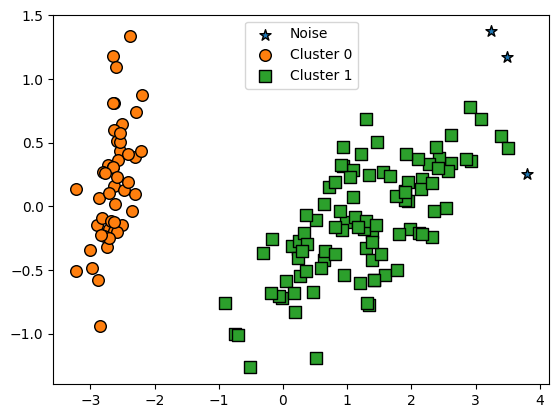

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)


target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: dbscan_cluster, dtype: int64


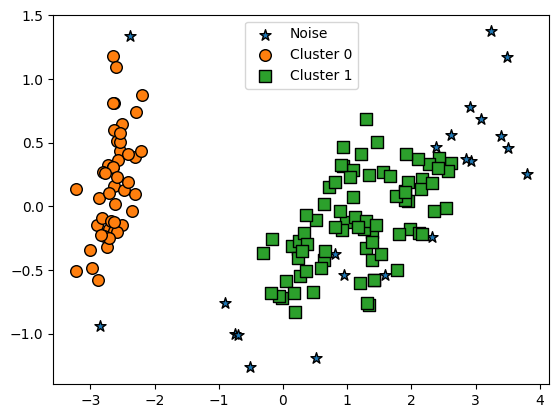

In [ ]:
dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)


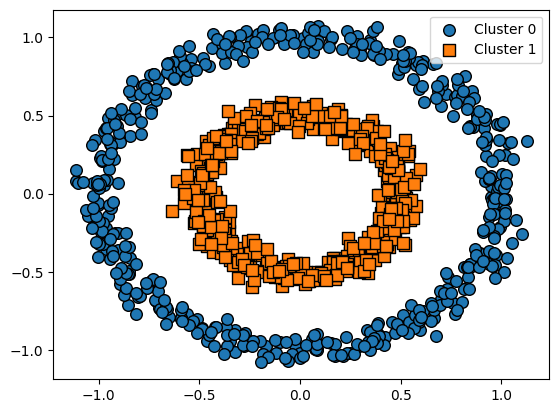

In [ ]:
# DBSCAN 적용하기 - make_circles() 데이터 세트

from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

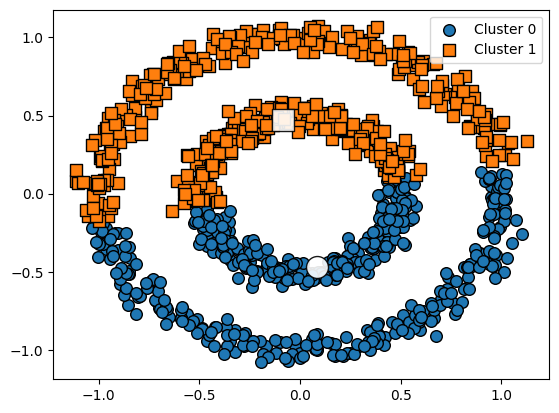

In [ ]:
# KMeans로 make_circles() 데이터 세트를 군집화 수행
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
clusterDF['kmeans_cluster'] = kmeans_labels

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter=True)


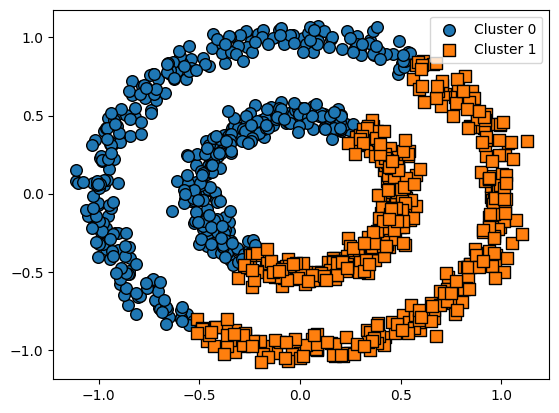

In [ ]:
# GMM으로 make_circles() 데이터 세트를 군집화 수행
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=0)
gmm_label = gmm.fit(X).predict(X)
clusterDF['gmm_cluster'] = gmm_label

visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter=False)


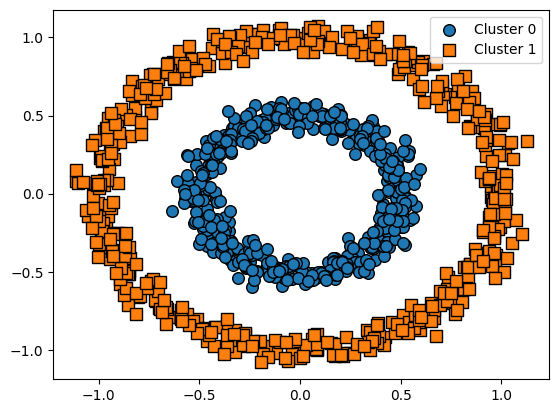

In [ ]:
# DBSCAN으로 make_circles() 데이터 세트 군집화 수행
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_labels
visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)
